# Domácí úkol č. 1 - 🕵️‍♀️ Explorační analýza dat

## 📚 Data
V souborech `intakes.csv` a `outcomes.csv` naleznete data z útulku ve městě Austin, Texas USA. Data pocházejí z oficiálního [zdroje otevřených dat města Austin](https://data.austintexas.gov/).

Dataset [intakes](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Intakes/wter-evkm) obsahuje data o přijatých zvířatech od 1. 10. 2013 do 6. 10. 2024. Dataset [outcomes](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Outcomes/9t4d-g238) obsahuje údaje o zvířatech, která útulek opustila (např. byla adoptována, vrácena majiteli a podobně) za tentýž časový interval. Může se stát, že zvířata přijatá do 1. 10. 2013 se nevyskytují v `intakes.csv` (data se ještě neshromažďovala), ale budou mít záznam v `outcomes.csv`, pokud útulek po tomto datu opustila.

☝️ Každý dataset může **stejné zvíře obsahovat víckrát** (1. některá zvířata se do útulku vracela - to je trochu komplikace, pokud byste datasety chtěli spojit - pro řešení úkolu spojování ale není nutné, 2. některé záznamy jsou duplicitní - ty můžete odstranit, jedná se o chybu). 

## Zadání
> ☝️ Používejte markdown buňky! Zdůvodňujte všechny důležité kroky, popisujte vizualizace a co je z nich možné pozorovat. Za nepřehledný domácí úkol nebudou uděleny body.

> ❌ Zkopírovaný kód ze cvičení (především ze cvičení 2) nebude uznán!

> ‼️ Akceptovatelný je úkol pouze v češtině, slovenštině nebo angličtině.

Za řádné průběžné komentování a vizuální prezentaci postupu a výsledků lze získat až 3 body.

**✨ Příprava dat** (celkem 4 body)
* Importujte potřebné balíčky.
* Načtěte si datasety intakes a outcomes z příslušných csv souborů.
* Seznamte se s oběma datasety a svá zjištění komentujte:
  * Příklad informací, které lze zjistit: počet řádků datasetu, počet a význam příznaků, datový typ příznaků a počet jejich unikátních hodnot, ...
* Vyčistěte a zkonvertujte data:
  * Zjistěte jakým způsobem jsou v datasetu uváděny chybějící hodnoty a v případě potřeby je přepište na NaN.
  * Zkonvertujte kategorické příznaky na typ category.
  * Převeďte příznak Age upon Intake/Outcome na numerický příznak.
  * Převeďte příznak DateTime na typ datetime64.
  * Proveďte všechny další úpravy, které vám dávají smysl (konverze dalších příznaků, odstranění duplicitních údajů, přidání nových příznaků, ...).
  
**🖊️ Deskriptivní statistiky** (celkem 6 bodů)

Volbu vhodných statistik pro daný typ dat komentujte a pokud je to možné, využívejte co nejvíce vizualizace.
* Popište příznaky Age upon Intake a DateTime (původně z datasetu intakes) pomocí univariačních deskriptivních statistik.
* Vyberte si tři další příznaky a popište je pomocí univariačních deskriptivních statistik, které jsou pro ně vhodné.
* Vyberte si dva příznaky, mezi kterými by mohl být nějaký vztah (např. korelace) a popište tento vztah pomocí bivariačních deskriptivních statistik. Dvojice typu Age upon Intake a Age upon Outcome neuznáváme.

**❓ Zadané otázky** (2 body za každou otázku, celkem max. 6 bodů)

Pomocí vhodných vizualizací odpovídejte na následující otázky:
* Závisí typ odchodu zvířete z útulku (Outcome Type) na typu příchodu (Intake Type)? Pokud chcete, uvažujte pro zjednodušení pouze zvířata, která se v každém datasetu vyskytují právě jednou.
* Hraje věk zvířete roli při adopci?
* Je příjem zvířat v rámci roku konstantní nebo existují období s větší/nižší zátěží?

K jedné otázce můžete v případě potřeby vytvořit více vizualizací. Výsledek vizualizace a všechny mezikroky komentujte.

**❓ Vlastní otázky** (2 body za každou otázku, celkem max. 6 bodů)

Vymyslete **minimálně tři** vlastní otázky a odpovídejte na ně vhodnými vizualizacemi. Otázky můžete postavit na již zmíněných datasetech. Také je možné využít třetí dataset [locations](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Found-Pets-Map/hye6-gvq2), který naleznete v souboru locations.csv, nebo si můžete stáhnout nějaká další zajímavá data, která souvisí s tímto tématem.

Dataset locations poskytuje informace o všech toulavých kočkách a psech, které jsou v databázi útulku **méně než týden**. Většina se nachází v útulku, ale část z nich je u dobrovolníků – tato informace je uvedena ve sloupci At AAC (AAC – Austin Animal Center).

### Bodové hodnocení
Shrnutí bodů, které můžete nejvýše získat:
- 3 body za komentáře a vizuální prezentaci postupu a výsledků,
- 4 body za přípravu dat,
- 6 bodů za deskriptivní statistiku,
- 6 bodů za zodpovězení všech zadaných otázek,
- 6 bodů za definici a zodpovězení minimálně tří vlastních otázek.

Celkem lze za domácí úkol č. 1 získat maximálně 25 bodů.

In [172]:
# a teď už je to na vás 💪
# níže vložte své řešení

#Rešení

# ✨ Data preparation

# Import necessary libraries

In [173]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd

**📝Reading data sets**

In [174]:
df_intakes = pd.read_csv("intakes.csv")
df_outcomes = pd.read_csv("outcomes.csv")

df_intakes.info()
df_outcomes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167556 entries, 0 to 167555
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         167556 non-null  object
 1   Name              119338 non-null  object
 2   DateTime          167556 non-null  object
 3   MonthYear         167556 non-null  object
 4   Found Location    167556 non-null  object
 5   Intake Type       167556 non-null  object
 6   Intake Condition  167556 non-null  object
 7   Animal Type       167556 non-null  object
 8   Sex upon Intake   167554 non-null  object
 9   Age upon Intake   167555 non-null  object
 10  Breed             167556 non-null  object
 11  Color             167556 non-null  object
dtypes: object(12)
memory usage: 15.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167559 entries, 0 to 167558
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------

**From the output of the info function, we can see that there are missing values in columns like 'Name' and 'Sex upon Intake'. The data type of all columns is object, which is not ideal, so some columns will need to be converted to more appropriate data types (e.g., datetime or category).**

# ☝️ Check for missing values in the intakes and outcomes dataset

In [175]:
print("\nMissing values in Intakes Data:")
print(df_intakes.isnull().sum())

print("\nMissing values in Outcomes Data:")
print(df_outcomes.isnull().sum())


Missing values in Intakes Data:
Animal ID               0
Name                48218
DateTime                0
MonthYear               0
Found Location          0
Intake Type             0
Intake Condition        0
Animal Type             0
Sex upon Intake         2
Age upon Intake         1
Breed                   0
Color                   0
dtype: int64

Missing values in Outcomes Data:
Animal ID               0
Name                48083
DateTime                0
MonthYear               0
Date of Birth           0
Outcome Type           44
Outcome Subtype     90591
Animal Type             0
Sex upon Outcome        3
Age upon Outcome       47
Breed                   0
Color                   0
dtype: int64


**There are missing values in key columns like Name, Sex upon Intake, Age upon Outcome, and Outcome Type. These missing values will need to be addressed before further analysis.**

# ☝️ Function to convert age strings to months

In [176]:
def convert_age_to_months(age_str):
    if isinstance(age_str, str):  # Check if it's a string
        age_str = age_str.strip()  
        if 'year' in age_str:
            return int(age_str.split()[0]) * 12  # Convert years to months
        elif 'month' in age_str:
            return int(age_str.split()[0])  # Return months as they are
        elif 'week' in age_str:
            return int(age_str.split()[0]) / 4  # Convert weeks to months
        elif 'day' in age_str:
            return int(age_str.split()[0]) / 30  # Convert days to months
    return np.nan 


**☝️Apply the function to 'Age upon Intake' and 'Age upon Outcome' columns**

In [177]:
df_intakes['Age upon Intake (in months)'] = df_intakes['Age upon Intake'].apply(convert_age_to_months)
df_outcomes['Age upon Outcome (in months)'] = df_outcomes['Age upon Outcome'].apply(convert_age_to_months)

**Display data for verification and clarification about data set**
**Boxplot for 'Age upon Intake (in months)' and 'Age upon Outcome (in months)'**

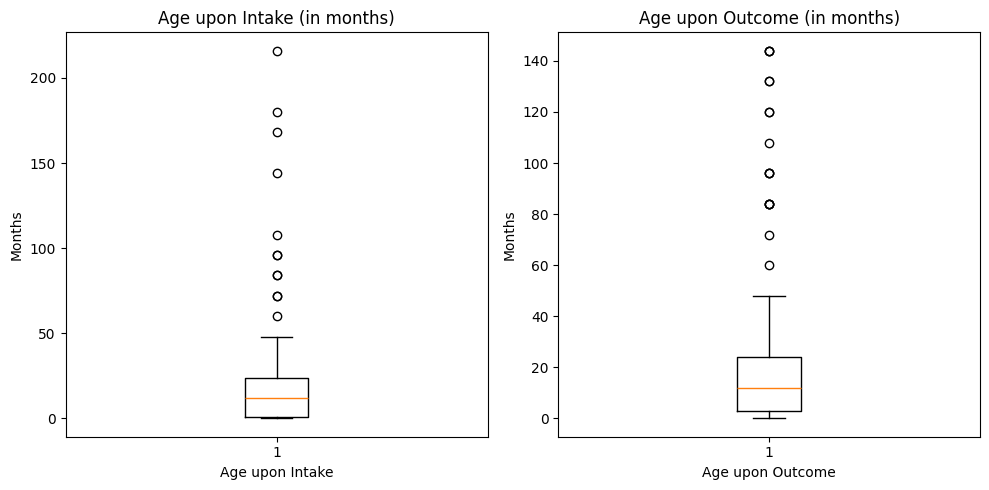

In [178]:
plt.figure(figsize=(10, 5))

# Boxplot for 'Age upon Intake (in months)'
plt.subplot(1, 2, 1)
plt.boxplot(df_intakes['Age upon Intake (in months)'].head(100))
plt.title('Age upon Intake (in months)')
plt.xlabel('Age upon Intake')
plt.ylabel('Months')

# Boxplot for 'Age upon Outcome (in months)'
plt.subplot(1, 2, 2)
plt.boxplot(df_outcomes['Age upon Outcome (in months)'].head(100))
plt.title('Age upon Outcome (in months)')
plt.xlabel('Age upon Outcome')
plt.ylabel('Months')

# Display the plot
plt.tight_layout()
plt.show()

**I plotted histograms to analyze the distribution of 'Age upon Outcome (in months)' and 'Age upon Intake (in months)'.
The data shows a strong skew towards younger animals, with a few outliers representing older animals.
Given this skewed distribution, using the median to fill missing values is a better choice than the mean,
as the median is less affected by the presence of outliers in the data.**

# ☝️Filling missing values with median for 'Age upon Intake'or 'Noname' for 'Name'

In [179]:
df_intakes['Name'] = df_intakes['Name'].fillna('Noname')

df_intakes['Sex upon Intake'] = df_intakes['Sex upon Intake'].fillna(df_intakes['Sex upon Intake'].mode()[0])

df_intakes['Age upon Intake (in months)'] = df_intakes['Age upon Intake (in months)'].fillna(df_intakes['Age upon Intake (in months)'].median())

df_intakes['Age upon Intake'] = df_intakes['Age upon Intake'].fillna(df_intakes['Age upon Intake (in months)'].median())

# ☝️Check for missing values in the intakes dataset after filling

In [180]:
print("\nMissing values in Intakes Data:")
print(df_intakes.isnull().sum())


Missing values in Intakes Data:
Animal ID                      0
Name                           0
DateTime                       0
MonthYear                      0
Found Location                 0
Intake Type                    0
Intake Condition               0
Animal Type                    0
Sex upon Intake                0
Age upon Intake                0
Breed                          0
Color                          0
Age upon Intake (in months)    0
dtype: int64


# ☝️Filling missing values in 'Outcome Subtype' with 'Unknown' or 'NoName'

In [181]:
# Fill missing values for categorical columns with fixed values
df_outcomes['Outcome Subtype'] = df_outcomes['Outcome Subtype'].fillna('Unknown')
df_outcomes['Age upon Outcome'] = df_outcomes['Age upon Outcome'].fillna('Unknown')
df_outcomes['Outcome Type'] = df_outcomes['Outcome Type'].fillna('Unknown')
df_outcomes['Name'] = df_outcomes['Name'].fillna('NoName')
df_outcomes['Sex upon Outcome'] = df_outcomes['Sex upon Outcome'].fillna('Unknown')

# Fill missing values for numeric columns with the median
df_outcomes['Age upon Outcome (in months)'] = df_outcomes['Age upon Outcome (in months)'].fillna(df_outcomes['Age upon Outcome (in months)'].median())

# Check for missing values after filling
print("\nMissing values in Outcomes Data after filling:")
print(df_outcomes.isnull().sum())


Missing values in Outcomes Data after filling:
Animal ID                       0
Name                            0
DateTime                        0
MonthYear                       0
Date of Birth                   0
Outcome Type                    0
Outcome Subtype                 0
Animal Type                     0
Sex upon Outcome                0
Age upon Outcome                0
Breed                           0
Color                           0
Age upon Outcome (in months)    0
dtype: int64


**Calculate the median for 'Age upon Intake (in months)' and 'Age upon Outcome (in months)'**

In [182]:
median_age_intakes = df_intakes['Age upon Intake (in months)'].median()
median_age_outcomes = df_outcomes['Age upon Outcome (in months)'].median()

In [183]:
#Intake
df_intakes.loc[df_intakes['Age upon Intake (in months)'] < 0, 'Age upon Intake (in months)'] = median_age_intakes
#Outcome
df_outcomes.loc[df_outcomes['Age upon Outcome (in months)'] < 0, 'Age upon Outcome (in months)'] = median_age_outcomes

**We are removing negative values from the age columns ('Age upon Intake (in months)' and 'Age upon Outcome (in months)')
and replacing them with the median. Negative values are most likely errors, and replacing them with the median ensures data consistency**

**☝️Replace negative values in 'Age upon Intake (in months)' with the median**

**Check if any negative values remain** 

In [184]:
# Intake
negative_age_intakes = df_intakes[df_intakes['Age upon Intake (in months)'] < 0]
print(f"\nNumber of negative values in 'Age upon Intake (in months)' after replacement: {len(negative_age_intakes)}")

#Outcome
negative_age_outcomes = df_outcomes[df_outcomes['Age upon Outcome (in months)'] < 0]
print(f"\nNumber of negative values in 'Age upon Outcome (in months)' after replacement: {len(negative_age_outcomes)}")


Number of negative values in 'Age upon Intake (in months)' after replacement: 0

Number of negative values in 'Age upon Outcome (in months)' after replacement: 0


# ☝️Plotting the graph to verify that the dataset remains unchanged after handling missing values

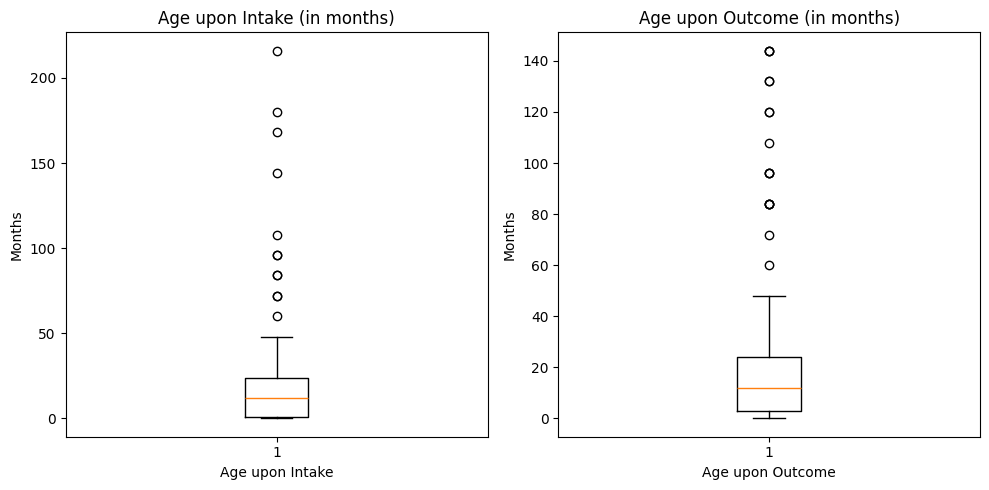

In [185]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.boxplot(df_intakes['Age upon Intake (in months)'].head(100))
plt.title('Age upon Intake (in months)')
plt.xlabel('Age upon Intake')
plt.ylabel('Months')

plt.subplot(1, 2, 2)
plt.boxplot(df_outcomes['Age upon Outcome (in months)'].head(100))
plt.title('Age upon Outcome (in months)')
plt.xlabel('Age upon Outcome')
plt.ylabel('Months')

plt.tight_layout()
plt.show()

**☝️We remove the 'MonthYear' column since all the necessary information is now present in the 'DateTime' column.**

In [186]:
df_intakes = df_intakes.drop('MonthYear', axis=1)  # Dropping the 'MonthYear' column from the intakes dataset
df_outcomes = df_outcomes.drop('MonthYear', axis=1)  # Dropping the 'MonthYear' column from the outcomes dataset

In [187]:
# Defining categorical columns for 'intakes' dataset
categorical_columns_intakes = [
    'Intake Type', 'Intake Condition', 'Animal Type', 'Sex upon Intake',
    'Breed', 'Color'
]

# Converting to 'category' type for 'intakes' dataset
df_intakes[categorical_columns_intakes] = df_intakes[categorical_columns_intakes].astype('category')

# Defining categorical columns for 'outcomes' dataset
categorical_columns_outcomes = [
    'Outcome Type', 'Outcome Subtype', 'Animal Type', 'Sex upon Outcome',
    'Breed', 'Color'
]

# Converting to 'category' type for 'outcomes' dataset
df_outcomes[categorical_columns_outcomes] = df_outcomes[categorical_columns_outcomes].astype('category')

# Checking the data types to verify the conversion

In [188]:
print("\nIntakes Data Types After Conversion:")
print(df_intakes.dtypes)

print("\nOutcomes Data Types After Conversion:")
print(df_outcomes.dtypes)


Intakes Data Types After Conversion:
Animal ID                        object
Name                             object
DateTime                         object
Found Location                   object
Intake Type                    category
Intake Condition               category
Animal Type                    category
Sex upon Intake                category
Age upon Intake                  object
Breed                          category
Color                          category
Age upon Intake (in months)     float64
dtype: object

Outcomes Data Types After Conversion:
Animal ID                         object
Name                              object
DateTime                          object
Date of Birth                     object
Outcome Type                    category
Outcome Subtype                 category
Animal Type                     category
Sex upon Outcome                category
Age upon Outcome                  object
Breed                           category
Color              

# ☝️Convert the 'DateTime' columns in both datasets, specifying the format for pandas(datetime64[ns])

In [189]:
df_intakes['DateTime'] = pd.to_datetime(df_intakes['DateTime'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
df_outcomes['DateTime'] = pd.to_datetime(df_outcomes['DateTime'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')

# Check the data types after the conversion to ensure 'DateTime' was correctly converted to datetime64

In [190]:
print("\nData types in Intakes after DateTime conversion:")
print(df_intakes.dtypes)

print("\nData types in Outcomes after DateTime conversion:")
print(df_outcomes.dtypes)


Data types in Intakes after DateTime conversion:
Animal ID                              object
Name                                   object
DateTime                       datetime64[ns]
Found Location                         object
Intake Type                          category
Intake Condition                     category
Animal Type                          category
Sex upon Intake                      category
Age upon Intake                        object
Breed                                category
Color                                category
Age upon Intake (in months)           float64
dtype: object

Data types in Outcomes after DateTime conversion:
Animal ID                               object
Name                                    object
DateTime                        datetime64[ns]
Date of Birth                           object
Outcome Type                          category
Outcome Subtype                       category
Animal Type                           category
Sex 

# ☝️Extracting month and year from 'DateTime'

In [191]:
df_intakes['Month'] = df_intakes['DateTime'].dt.month
df_intakes['Year'] = df_intakes['DateTime'].dt.year

df_outcomes['Month'] = df_outcomes['DateTime'].dt.month
df_outcomes['Year'] = df_outcomes['DateTime'].dt.year

# ☝️Displaying the first rows to verify the extraction

In [192]:
print("\nExtracted 'Month' and 'Year' columns in Intakes:")
print(df_intakes[['DateTime', 'Month', 'Year']].head())

print("\nExtracted 'Month' and 'Year' columns in Outcomes:")
print(df_outcomes[['DateTime', 'Month', 'Year']].head())


Extracted 'Month' and 'Year' columns in Intakes:
             DateTime  Month  Year
0 2019-01-03 16:19:00      1  2019
1 2015-07-05 12:59:00      7  2015
2 2016-04-14 18:43:00      4  2016
3 2013-10-21 07:59:00     10  2013
4 2022-05-12 00:23:00      5  2022

Extracted 'Month' and 'Year' columns in Outcomes:
             DateTime  Month  Year
0 2023-07-01 18:12:00      7  2023
1 2019-05-08 18:20:00      5  2019
2 2018-07-18 16:02:00      7  2018
3 2020-08-16 11:38:00      8  2020
4 2016-02-13 17:59:00      2  2016


# ☝️Checking if there are some duplicates

In [193]:
duplicates_intakes = df_intakes.duplicated().sum()
duplicates_outcomes = df_outcomes.duplicated().sum()

print(f"Number of duplicates in intakes: {duplicates_intakes}")
print(f"Number of duplicates in outcomes: {duplicates_outcomes}")

Number of duplicates in intakes: 32
Number of duplicates in outcomes: 24


# ☝️Dropping duplicates

In [194]:
intakes_cleaned = df_intakes.drop_duplicates()
outcomes_cleaned = df_outcomes.drop_duplicates()

# Checking size before and after deleting duplicates

In [195]:
print(f"\nSize of intakes before cleaning: {df_intakes.shape}")
print(f"Size of intakes after cleaning: {intakes_cleaned.shape}")

print(f"\nSize of outcomes before cleaning: {df_outcomes.shape}")
print(f"Size of outcomes after cleaning: {outcomes_cleaned.shape}")


Size of intakes before cleaning: (167556, 14)
Size of intakes after cleaning: (167524, 14)

Size of outcomes before cleaning: (167559, 14)
Size of outcomes after cleaning: (167535, 14)


# 🖊️ Descriptive statistics for 'Age upon Intake (in months)'

In [196]:
print("\nDescriptive statistics for 'Age upon Intake (in months)':")
print(df_intakes['Age upon Intake (in months)'].describe())


Descriptive statistics for 'Age upon Intake (in months)':
count    167556.000000
mean         23.365392
std          33.568999
min           0.000000
25%           2.000000
50%          12.000000
75%          24.000000
max         360.000000
Name: Age upon Intake (in months), dtype: float64


# Convert months to years for visualization and plotting histogram graph

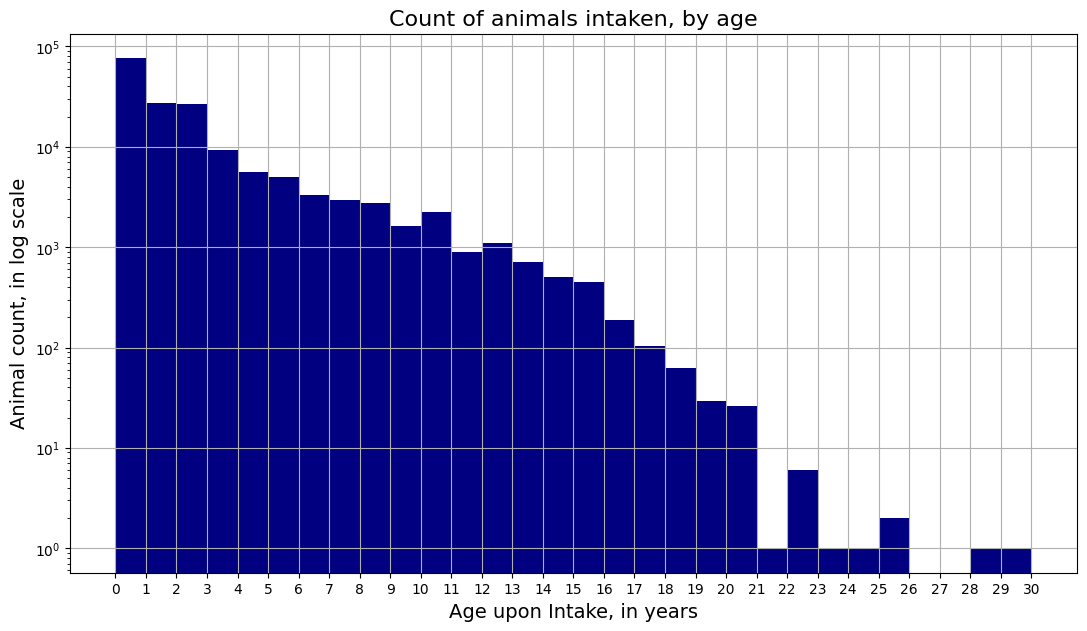

In [197]:
intakes_filtered = df_intakes[df_intakes['Age upon Intake (in months)'].notnull()]  # Example filter to exclude NaN values

intakes_filtered.loc[:, 'Age upon Intake (in years)'] = intakes_filtered['Age upon Intake (in months)'] / 12

# Plotting the histogram
plt.figure(figsize=(13, 7))
plt.hist(intakes_filtered['Age upon Intake (in years)'], bins=30, color='navy', log=True)
plt.xticks(ticks=range(0, 31, 1))  # Adding ticks from 0 to 30 with a step of 1 year
plt.title('Count of animals intaken, by age', fontsize=16)
plt.xlabel('Age upon Intake, in years', fontsize=14)
plt.ylabel('Animal count, in log scale', fontsize=14)
plt.grid(True)
plt.show()


****📌CONSLUSION:****
**Most animals entering the shelter are between 0 and 1 year of age, indicating that very young animals are most likely to be admitted to these 
facilities. 
The number of admissions decreases sharply with age, with very few animals over 10 years old being taken in by shelters.
This pattern highlights that younger animals dominate shelter admissions, while older animals, especially those over 10 years, are much less 
common and may require special care and attention.**

# 🖊️ Descriptive statistics for 'DateTime'

**1) Count the number of intakes per month using the 'Month' and 'Year' columns**
**2) Group by 'Year-Month' to count the number of intakes per month**
**3) Create DataFrame with Month and Count columns**

In [198]:
# 1)
df_intakes['Year-Month'] = df_intakes['Year'].astype(str) + '-' + df_intakes['Month'].astype(str).str.zfill(2)

# 2)
month_counts = df_intakes['Year-Month'].value_counts().sort_index()

# 3)
df_month_counts = pd.DataFrame({'Month': month_counts.index, 'Count': month_counts.values})

# Plotting the graph

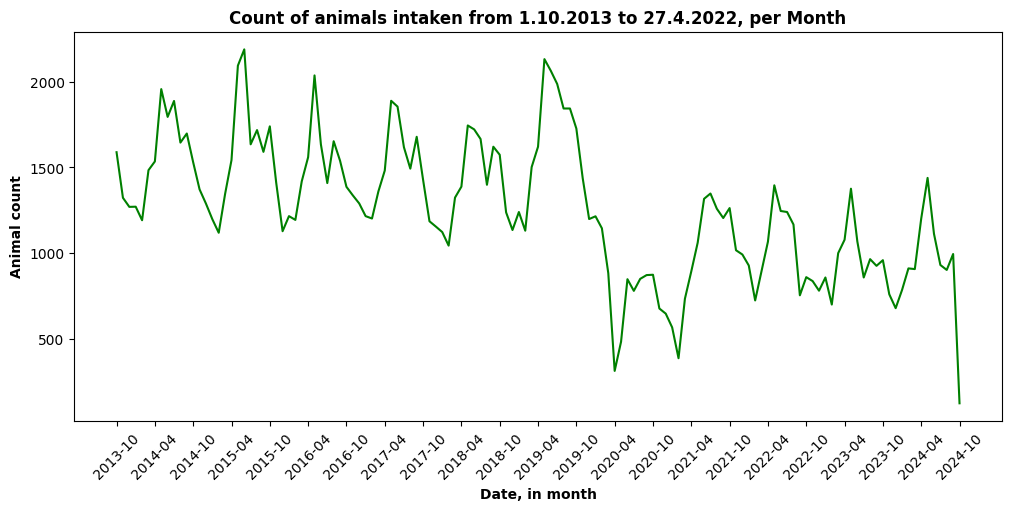

In [199]:
fig = plt.figure(figsize=(10, 5), constrained_layout=True)
spec = gridspec.GridSpec(ncols=1, nrows=1, figure=fig)
ax = fig.add_subplot(spec[0, :])
sns.lineplot(data=df_month_counts, ax=ax, x='Month', y='Count', color="green")
plt.xlabel('Date, in month', fontweight='bold')
plt.ylabel('Animal count', fontweight='bold')
plt.title('Count of animals intaken from 1.10.2013 to 27.4.2022, per Month', fontweight='bold')

# Set X-axis tick interval to every 6 months
plt.xticks(rotation=45, ticks=range(0, len(df_month_counts), 6))
plt.show()


****📌CONSLUSION:****
**The graph shows seasonal fluctuations in animal intake, with higher numbers typically seen in spring and summer, and lower intakes during winter months. The decline in intakes towards the end of the period, particularly around 2022, may reflect external factors such as the pandemic or changes in shelter policies.**

# 🖊️ Own Univariate Descriptive Statistics Questions:

# 👉 1. Feature: 'Outcome Type':

**1) Identifying rare outcomes (occurring in less than 5% of cases)**
**2) If the column is categorical, convert it back to string type for using replace()**
**3) Replace rare outcomes with 'Others**
**4) Create age categories based on age in months (0-1 year, 1-5 years, 5-10 years, 10-20 years, 20+ years)**
**5) Grouping data by age category and simplified outcome type**

In [200]:
# 1)
outcome_counts = df_outcomes['Outcome Type'].value_counts(normalize=True)
rare_outcomes = outcome_counts[outcome_counts < 0.05].index

# 2)
if isinstance(df_outcomes['Outcome Type'].dtype, pd.CategoricalDtype):
    # Convert the categorical column to a regular type
    df_outcomes['Outcome Type'] = df_outcomes['Outcome Type'].astype(str)
    
# 3)
df_outcomes['Outcome Type Simplified'] = df_outcomes['Outcome Type'].replace(rare_outcomes, 'Others')

# 4)
df_outcomes['Age Category'] = pd.cut(
    df_outcomes['Age upon Outcome (in months)'],
    bins=[0, 12, 60, 120, 240, np.inf],
    labels=['0-1 year', '1-5 years', '5-10 years', '10-20 years', '20+ years']
)

# 5)
outcome_age_counts_simplified = df_outcomes.groupby(['Age Category', 'Outcome Type Simplified'], observed=False).size().unstack()

# Plotting the chart

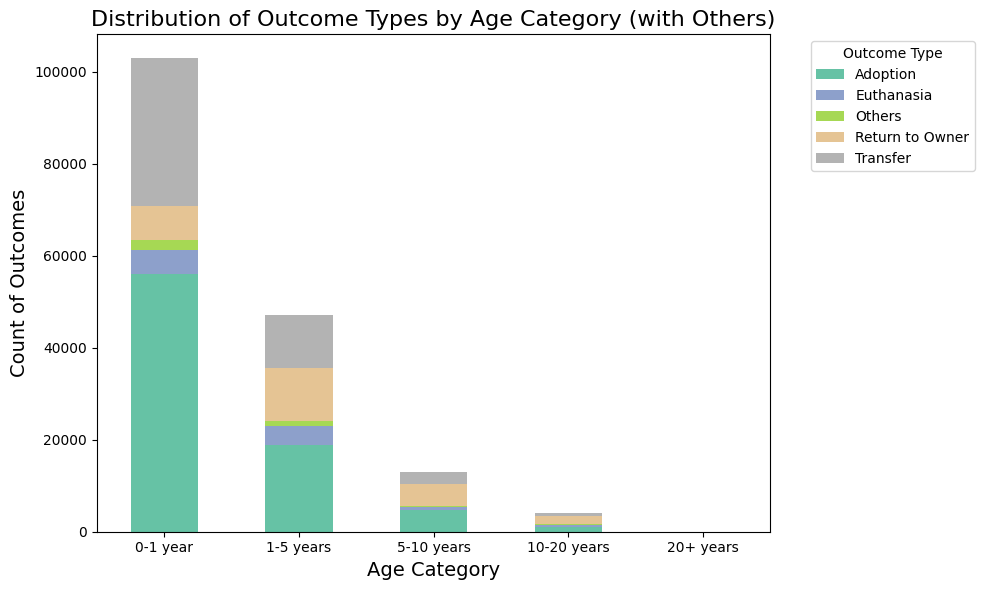

In [201]:
outcome_age_counts_simplified.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')

# Setting axis labels and title
plt.title('Distribution of Outcome Types by Age Category (with Others)', fontsize=16)
plt.xlabel('Age Category', fontsize=14)
plt.ylabel('Count of Outcomes', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title='Outcome Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Display the plot
plt.show()

****📌CONSLUSION****
**The graphs show that for the youngest animals (0-1 year old) the main outcomes are adoption and return to owner, with adoption predominating. In the 10-20 year age group, the highest proportion is return to owner (42.1%), but euthanasia also increases (11.1%) due to age-related health problems. In general, as animals age, they are adopted less frequently and returned to owners more frequently.**

# 👉 2. Feature: 'Animal Type':

**Function for univariate descriptive statistics and visualization for categorical data**

In [202]:
def animal_type_analysis(df, column):
    stats_df = pd.DataFrame({
        'Frequency': df[column].value_counts(),
        'Relative frequency': df[column].value_counts(normalize=True)
    })
    # Display the frequency and relative frequency table
    display(stats_df)

    # Set up the figure for visualization
    fig = plt.figure(figsize=(10, 10), constrained_layout=True)
    spec = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)
    ax1 = fig.add_subplot(spec[0, :])  # Countplot
    ax2 = fig.add_subplot(spec[1, 0])  # Pie chart for all categories
    ax3 = fig.add_subplot(spec[1, 1])  # Pie chart for rare categories

    # Create countplot (animal count by type)
    sns.countplot(data=df, x=column, order=df[column].value_counts().index, ax=ax1)
    ax1.bar_label(ax1.containers[0])
    ax1.set_ylabel('Animal count', fontweight='bold')
    ax1.set_xlabel('Animal type', fontweight='bold')
    ax1.set_title('Count of animals intaken, by animal type', fontweight='bold')

    # Pie chart for all categories
    ax2.pie(stats_df['Frequency'], labels=stats_df.index, autopct='%1.1f%%')
    
    # Pie chart for rare categories (everything except Dog and Cat)
    ax3.pie(stats_df.loc[(stats_df.index != 'Dog') & (stats_df.index != 'Cat'), 'Frequency'], 
            labels=stats_df.index[(stats_df.index != 'Dog') & (stats_df.index != 'Cat')], 
            autopct='%1.1f%%')
    
    # Show the plots
    plt.show()

# Plotting the Graph

,Frequency,Relative frequency
Animal Type,,
Dog,91648,0.546969
Cat,66360,0.396047
Other,8673,0.051762
Bird,845,0.005043
Livestock,30,0.000179


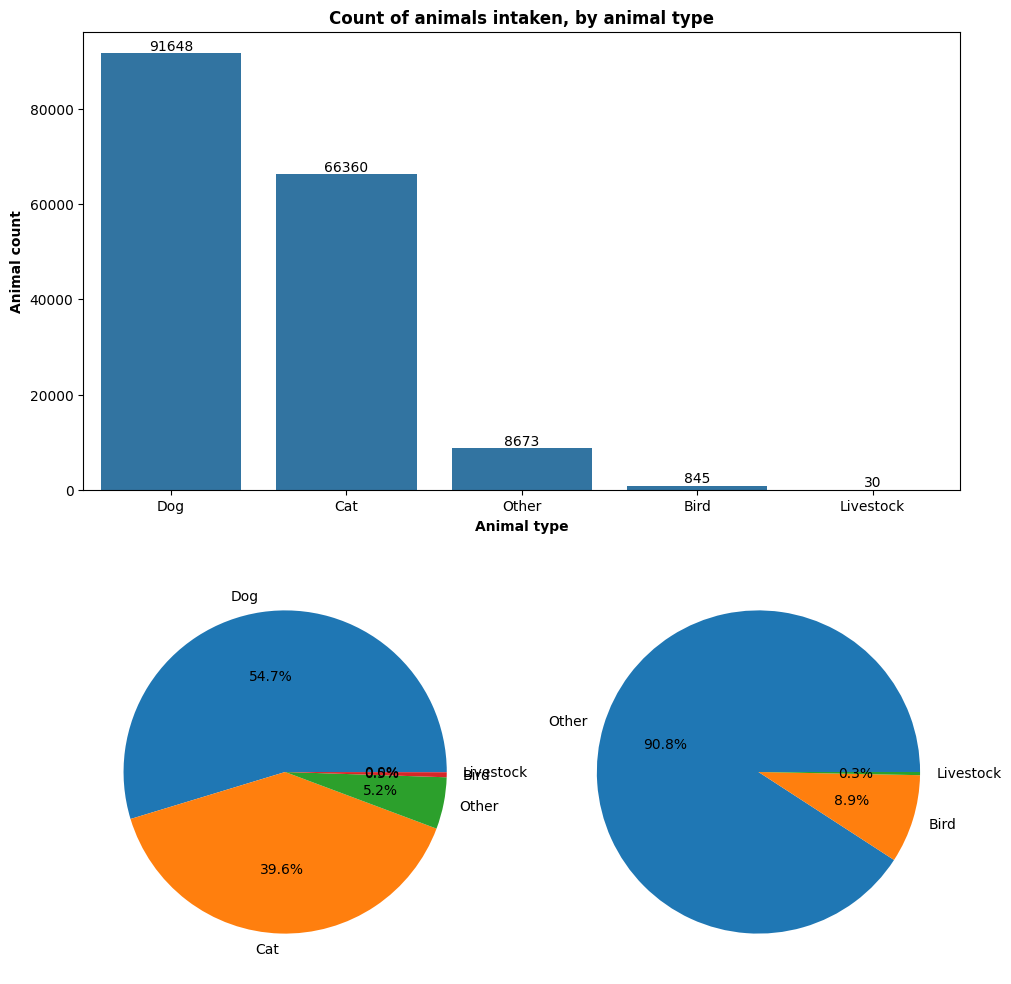

In [203]:
animal_type_analysis(df_intakes, 'Animal Type')

****📌CONSLUSION:**** 
**The analysis of the intake "Animal Type" shows that the majority of animals admitted to the shelter are dogs (54.7%) and cats (39.6%), making up a combined total of more than 90% of all animal intakes. Other types of animals, such as birds (0.6%) and livestock (0.03%), are much less common. This indicates that shelters primarily deal with domestic pets like dogs and cats, while other animal types represent only a small fraction of total admissions.**

UDS #2,3

# ☝️ 3. Feature: 'Breed' analysis

*Breed analysis and display*

In [204]:
breed_counts = df_intakes['Breed'].value_counts()

top_breeds = breed_counts.head(10)
print(top_breeds)

Breed
Domestic Shorthair Mix       33623
Domestic Shorthair           21639
Pit Bull Mix                  9954
Labrador Retriever Mix        8525
Chihuahua Shorthair Mix       6834
German Shepherd Mix           3957
Domestic Medium Hair Mix      3331
Pit Bull                      3253
Bat                           2236
Australian Cattle Dog Mix     1942
Name: count, dtype: int64


**☝️Visualization of the top 10 breeds**

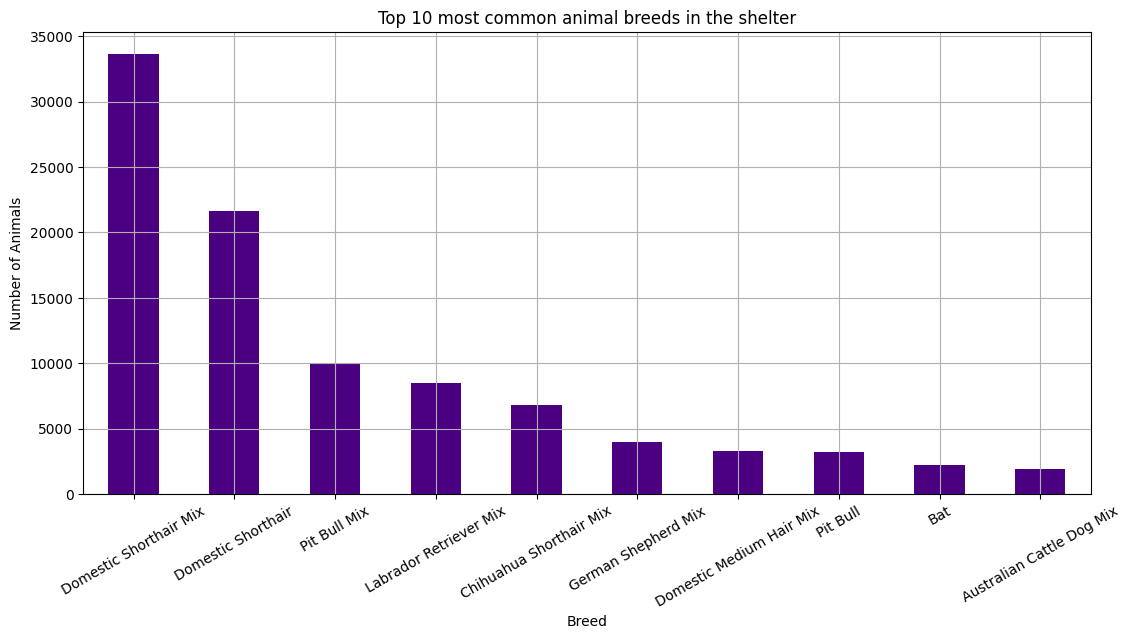

In [205]:
plt.figure(figsize=(13,6))
top_breeds.plot(kind='bar', color='indigo')
plt.title('Top 10 most common animal breeds in the shelter')
plt.xlabel('Breed')
plt.ylabel('Number of Animals')
plt.xticks(rotation=30)
plt.grid(True)
plt.show()

****📌CONSLUSION:****
***Based on the graph, the most common breeds in the shelter are overwhelmingly "Domestic Shorthair Mix" and "Domestic Shorthair," with over 30,000 animals each. Following these, "Pit Bull Mix" and "Labrador Retriever Mix" are also frequent, though in much smaller numbers. The remaining breeds, such as "Chihuahua Shorthair Mix" and "German Shepherd Mix," are significantly less common, with even fewer animals from less typical breeds like "Bat" and "Australian Cattle Dog Mix." This suggests that the shelter deals primarily with common domestic pets, while less typical breeds or species are much rarer.***

# ☝️ Description of the correlation between 'Intake Type' and 'Outcome Type' using bivariate descriptive statistics:

**☝️This function generates a log-scaled heatmap to visualize the relationship between two categorical variables from two DataFrames.**

In [206]:
def bivariate_cat_cat_ds(df1, df2, categorical1, categorical2):
    frequency_table = pd.crosstab(df1[categorical1], df2[categorical2])
    frequency_table = frequency_table.fillna(0)     # Check for any missing values, and replace them with 0 if they are absent

    log_crosstab = np.log(frequency_table + 1)     # Apply logarithmic scaling to the table for better visualization

    fig, ax1 = plt.subplots(1, 1, figsize=(10,7)) # Create the plot
    
    sns.heatmap(log_crosstab, cmap='coolwarm', annot=True, fmt='.2f', ax=ax1)     # Plot the heatmap with annotations
    # Set axis labels and title
    ax1.set_ylabel(categorical1, fontweight='bold')
    ax1.set_xlabel(categorical2, fontweight='bold')
    ax1.set_title('Log-Scaled Correlation Heatmap: ' + categorical1 + ' vs ' + categorical2, fontweight='bold')
    # Display the plot
    plt.show()

# Using function to plot data

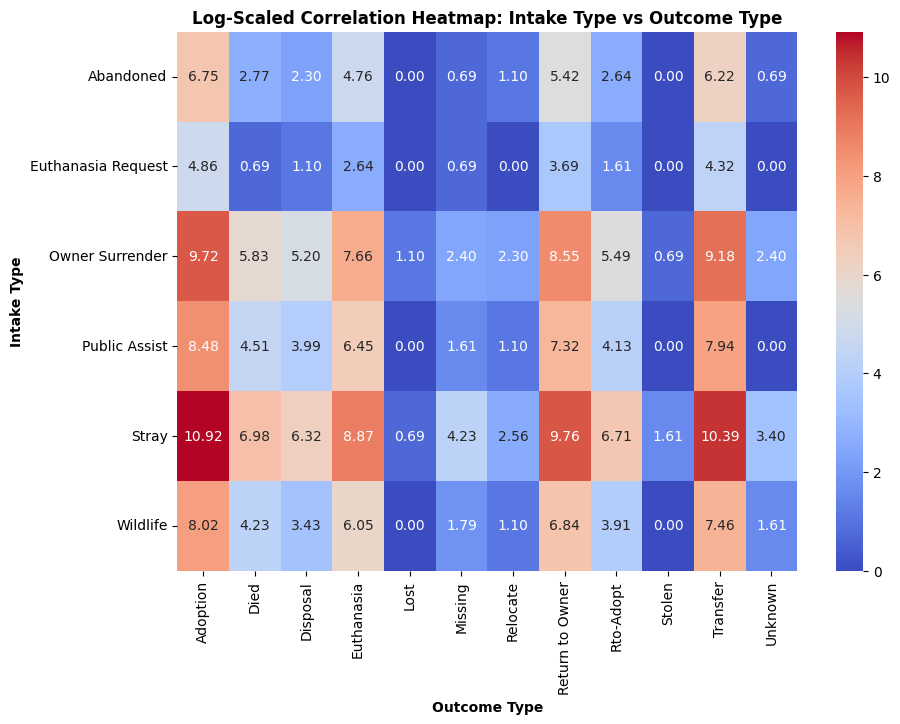

In [207]:
bivariate_cat_cat_ds(df_intakes, df_outcomes, 'Intake Type', 'Outcome Type')

****📌CONCLUSION:****
**The heat map shows that animals admitted as stray (Stray) are more likely to be adopted, returned to owners or transferred to other facilities. Animals surrendered by owners (Owner Surrender) also have a high chance of adoption, but euthanasia is more common for them. Euthanasia Request animals are almost always euthanised.**

# ❓QUESTIONS

**👉 1. Závisí typ odchodu zvířete z útulku (Outcome Type) na typu příchodu (Intake Type)?**

****📌CONCLUSION:****
**Based on the graph (showing the correlation between Intake Type and Outcome Type using bivariate descriptive statistics), stray animals are most frequently adopted, while animals that come in through euthanasia requests are more likely to be euthanized. Animals surrendered by their owners also have a good chance of being adopted, but their likelihood of euthanasia is higher compared to stray animals.**

 **👉 2. Hraje věk zvířete roli při adopci?**

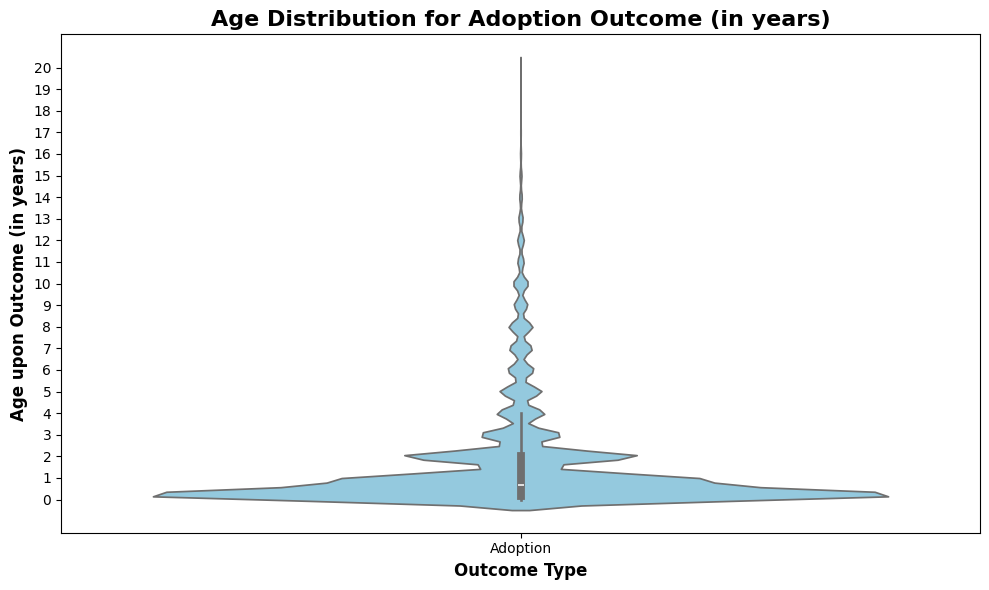

In [208]:
df_adoption = df_outcomes[df_outcomes['Outcome Type'] == 'Adoption']

# Define a color for the violin plot
adoption_color = 'skyblue'

# Create the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Outcome Type', y=df_adoption['Age upon Outcome (in months)'] / 12, 
               data=df_adoption, color=adoption_color)

# Setting titles and labels
plt.title('Age Distribution for Adoption Outcome (in years)', fontsize=16, fontweight='bold')
plt.xlabel('Outcome Type', fontsize=12, fontweight='bold')
plt.ylabel('Age upon Outcome (in years)', fontsize=12, fontweight='bold')

# Adding more ticks to Y-axis
plt.yticks(np.arange(0, 21, step=1))  # Ticks every 1 year

# Display the plot
plt.tight_layout()
plt.show()

****📌CONCLUSION:****
**Based on the graph, age plays a significant role in the adoption process. The majority of adopted animals are younger, with a noticeable concentration in the first few years of life. This indicates that younger animals are more likely to be adopted, while older animals have a lower probability of being chosen for adoption.**

 **👉 3. Je příjem zvířat v rámci roku konstantní nebo existují období s větší/nižší zátěží?**

***1) Extract the month name from the 'DateTime' column (which is already datetime format)
2) Group by the month and count the number of intakes for each month
3) Convert the groupby result into a DataFrame***

In [209]:
# 1)
df_intakes['Month'] = df_intakes['DateTime'].dt.strftime('%B')

# 2)
monthly_intake = df_intakes.groupby('Month').size().reindex(['January', 'February', 'March', 'April', 'May', 'June', 
                                                             'July', 'August', 'September', 'October', 'November', 'December'])
# 3)
df_monthly_intake = monthly_intake.reset_index(name='Animal Intake Count')

**Plotting the intake counts per month**

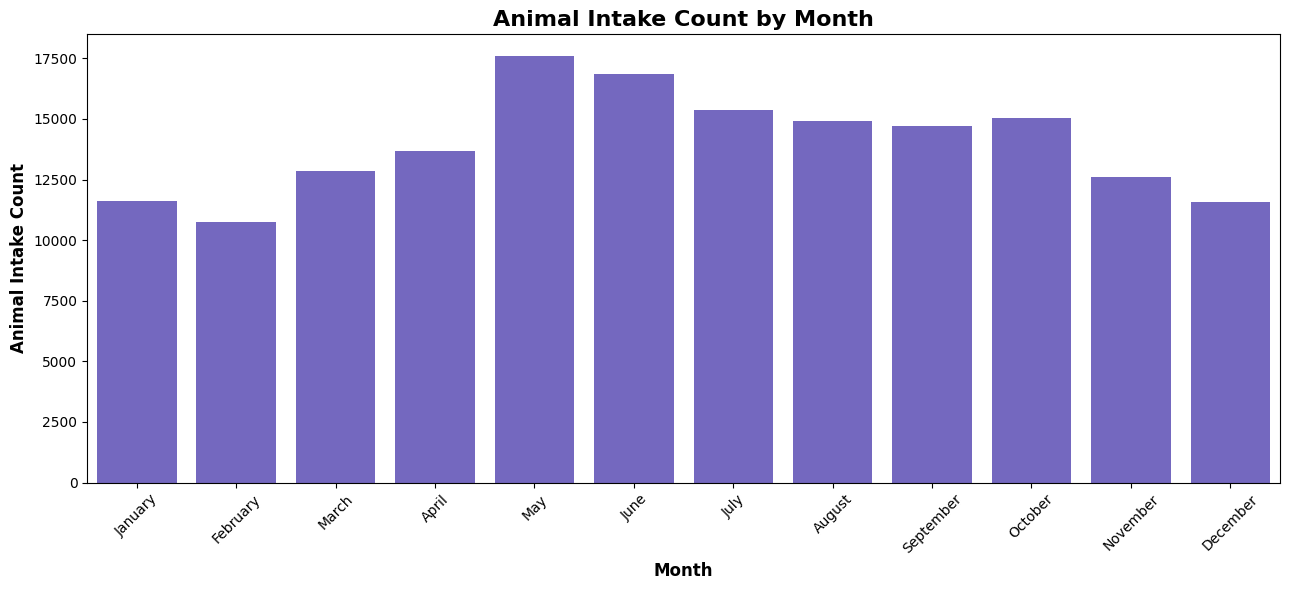

In [210]:
plt.figure(figsize=(13, 6))
sns.barplot(x='Month', y='Animal Intake Count', data=df_monthly_intake, color='slateblue')
plt.title('Animal Intake Count by Month', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12, fontweight='bold')
plt.ylabel('Animal Intake Count', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)

# Displaying the plot
plt.tight_layout()
plt.show()

****📌CONCLUSION:****
**Based on the graph, animal intake fluctuates throughout the year, likely influenced by seasonal factors. There is a noticeable peak in the summer months, particularly in June and July, when the highest number of animals is brought into shelters. Conversely, intake numbers drop significantly during the winter months, especially in January and December, reflecting seasonal variations in shelter admissions.**

# ❓ Vlastní otázky

# ☝️ Need to prepare 'locations.csv' data to plot the graphs 

*Read "locations" dataset*

In [211]:
df_locations = pd.read_csv("locations.csv")

*Data familiarisation ("locations.csv"): let's look at the dataset structure, data types, number of rows and columns.*

In [212]:
df_locations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Animal ID       109 non-null    object
 1   Found Location  109 non-null    object
 2   At AAC          109 non-null    object
 3   Intake Date     109 non-null    object
 4   Type            109 non-null    object
 5   Looks Like      109 non-null    object
 6   Color           109 non-null    object
 7   Sex             109 non-null    object
 8   Age             109 non-null    object
 9   Image Link      109 non-null    object
dtypes: object(10)
memory usage: 8.6+ KB


In [213]:
df_locations.shape

(109, 10)

# ☝️ Check for missing values in the locations dataset

In [214]:
print("\nMissing values in Locations Data:")
print(df_locations.isnull().sum())


Missing values in Locations Data:
Animal ID         0
Found Location    0
At AAC            0
Intake Date       0
Type              0
Looks Like        0
Color             0
Sex               0
Age               0
Image Link        0
dtype: int64


In [215]:
df_locations.head(3)

,Animal ID,Found Location,At AAC,Intake Date,Type,Looks Like,Color,Sex,Age,Image Link
0,A768798,"4021 STECK AVENUE\nAUSTIN 78759\n(30.37351, -9...",Yes (come to the shelter),09/25/2024,Cat,Domestic Medium Hair Mix,Tortie,Spayed Female,14 years,http://www.petharbor.com/pet.asp?uaid=ASTN.A76...
1,A913908,"2606 WHELESS LN\nAUSTIN 78723\n(30.31094, -97....",Yes (come to the shelter),09/23/2024,Cat,Domestic Shorthair,Brown Tabby,Intact Male,2 weeks,http://www.petharbor.com/pet.asp?uaid=ASTN.A91...
2,A913909,"2606 WHELESS LN\nAUSTIN 78723\n(30.31094, -97....",Yes (come to the shelter),09/23/2024,Cat,Domestic Shorthair,Brown Tabby,Intact Female,2 weeks,http://www.petharbor.com/pet.asp?uaid=ASTN.A91...


# ☝️Checking if there are some duplicates in locations


In [216]:
duplicates_locations = df_locations.duplicated().sum()

print(f"Number of duplicates in locations: {duplicates_locations}")

# Dropping duplicates
locations_cleaned = df_locations.drop_duplicates()

print(f"\nSize of locations before cleaning: {df_locations.shape}")
print(f"Size of locations after cleaning: {locations_cleaned.shape}")

Number of duplicates in locations: 0

Size of locations before cleaning: (109, 10)
Size of locations after cleaning: (109, 10)


**☝️Function to simplify values in 'At AAC' column**

In [217]:
def simplify_at_aac(value):
    if isinstance(value, str):  # Check if the value is a string
        value = value.strip()  # Remove any extra spaces
        if value.startswith('Yes') or value == 'Y':
            return 'Yes'
        elif value.startswith('No') or value == 'N':
            return 'No'
    return np.nan  # In case the format is not recognized

**Applying the function to the 'At AAC' column and checking the result**

In [218]:
df_locations['At AAC'] = df_locations['At AAC'].apply(simplify_at_aac)

print(df_locations[['At AAC']].head())

  At AAC
0    Yes
1    Yes
2    Yes
3    Yes
4    Yes


**☝️Converting the 'Intake Date' column to datetime format and checking the result**

In [219]:
df_locations['Intake Date'] = pd.to_datetime(df_locations['Intake Date'], format='%m/%d/%Y', errors='coerce')

print(df_locations.info())
print(df_locations.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Animal ID       109 non-null    object        
 1   Found Location  109 non-null    object        
 2   At AAC          109 non-null    object        
 3   Intake Date     109 non-null    datetime64[ns]
 4   Type            109 non-null    object        
 5   Looks Like      109 non-null    object        
 6   Color           109 non-null    object        
 7   Sex             109 non-null    object        
 8   Age             109 non-null    object        
 9   Image Link      109 non-null    object        
dtypes: datetime64[ns](1), object(9)
memory usage: 8.6+ KB
None
  Animal ID                                     Found Location At AAC  \
0   A768798  4021 STECK AVENUE\nAUSTIN 78759\n(30.37351, -9...    Yes   
1   A913908  2606 WHELESS LN\nAUSTIN 78723\n(30.31094, -97...

**☝️Converting other columns to categorical data type**

In [220]:
df_locations[["At AAC", "Type", "Looks Like", "Color", "Sex"]] = df_locations[["At AAC", "Type", "Looks Like", "Color", "Sex"]].astype("category")

**☝️Checking the results**

In [221]:
df_locations.info()

# Viewing the first few rows of data for validation
print(df_locations.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Animal ID       109 non-null    object        
 1   Found Location  109 non-null    object        
 2   At AAC          109 non-null    category      
 3   Intake Date     109 non-null    datetime64[ns]
 4   Type            109 non-null    category      
 5   Looks Like      109 non-null    category      
 6   Color           109 non-null    category      
 7   Sex             109 non-null    category      
 8   Age             109 non-null    object        
 9   Image Link      109 non-null    object        
dtypes: category(5), datetime64[ns](1), object(4)
memory usage: 7.4+ KB
  Animal ID                                     Found Location At AAC  \
0   A768798  4021 STECK AVENUE\nAUSTIN 78759\n(30.37351, -9...    Yes   
1   A913908  2606 WHELESS LN\nAUSTIN 78723\n(30.31094

**☝️Apply the already existing ('convert_age_to_months') function to the 'Age' column**

In [222]:
df_locations['Age (in months)'] = df_locations['Age'].apply(convert_age_to_months)

# Check the first few rows to ensure the function worked correctly
print(df_locations[['Age', 'Age (in months)']].head())

        Age  Age (in months)
0  14 years            168.0
1   2 weeks              0.5
2   2 weeks              0.5
3  6 months              6.0
4   2 weeks              0.5


In [223]:
df_locations['Age (in months)'] = df_locations['Age'].apply(convert_age_to_months)

**☝️Check for negative values in the 'Age (in months)' column**

In [224]:
negative_ages = df_locations[df_locations['Age (in months)'] < 0]

# Print the count of negative ages for verification
print(f"Number of records with negative ages: {len(negative_ages)}")

Number of records with negative ages: 0


**👉 1. How do intake and outcome counts vary by breed in the shelter?**

**1) Get the top 5 breeds based on intake counts and save them to a variable**
**2) Filter both intake and outcome data based on the top 5 breeds**
**3) Group and count occurrences for both intake and outcome data**
**4) Create a DataFrame for intake and outcome counts, but only include top 5 breeds**
**5) Output the DataFrame for validation**
**6) Melt the DataFrame for plotting**

In [225]:
# 1)
top_5_breeds = df_intakes['Breed'].value_counts().nlargest(5).index.tolist()
print("Top 5 breeds from intake data:")
print(top_5_breeds)

# 2)
filtered_intake = df_intakes[df_intakes['Breed'].isin(top_5_breeds)]
filtered_outcome = df_outcomes[df_outcomes['Breed'].isin(top_5_breeds)]

# 3)
intake_counts = filtered_intake['Breed'].value_counts()
outcome_counts = filtered_outcome['Breed'].value_counts()

# 4)
df_top5_breeds = pd.DataFrame({
    'Breed': top_5_breeds,  # We explicitly set the top 5 breeds here
    'Intake Count': intake_counts.reindex(top_5_breeds).values,  # Only top 5
    'Outcome Count': outcome_counts.reindex(top_5_breeds).fillna(0).values  # Only top 5
})

# 5)
print("\nDataFrame for top 5 breeds with intake and outcome counts:")
print(df_top5_breeds)

# 6)
df_melted = df_top5_breeds.melt(id_vars='Breed', value_vars=['Intake Count', 'Outcome Count'], var_name='Type', value_name='Count')

Top 5 breeds from intake data:
['Domestic Shorthair Mix', 'Domestic Shorthair', 'Pit Bull Mix', 'Labrador Retriever Mix', 'Chihuahua Shorthair Mix']

DataFrame for top 5 breeds with intake and outcome counts:
                     Breed  Intake Count  Outcome Count
0   Domestic Shorthair Mix         33623          33986
1       Domestic Shorthair         21639          21303
2             Pit Bull Mix          9954           9982
3   Labrador Retriever Mix          8525           8550
4  Chihuahua Shorthair Mix          6834           6869


**Plotting the Graph**

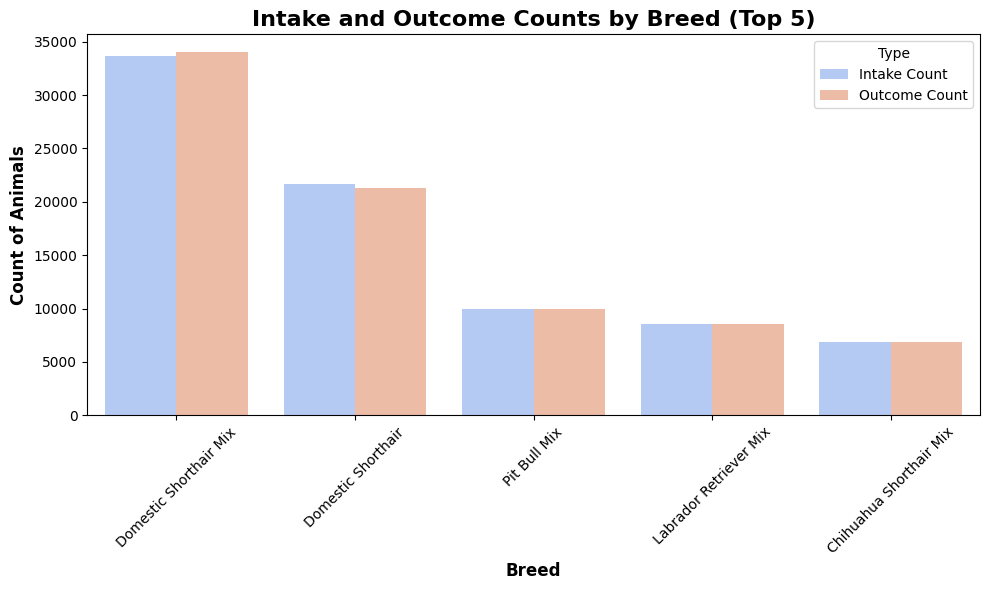

In [226]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Breed', y='Count', hue='Type', data=df_melted, palette='coolwarm')

# Set up titles and labels
plt.title('Intake and Outcome Counts by Breed (Top 5)', fontsize=16, fontweight='bold')
plt.xlabel('Breed', fontsize=12, fontweight='bold')
plt.ylabel('Count of Animals', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

****📌CONSLUSION:****
**The graph shows that Domestic Shorthair Mix has the highest number of both intakes and outcomes, with a nearly equal ratio, indicating that most of these animals find outcomes. Pit Bull Mix has more intakes than outcomes, suggesting potential challenges in adoption for this breed. Meanwhile, Labrador Retriever Mix and Chihuahua Shorthair Mix demonstrate a more balanced ratio between intakes and outcomes, suggesting that these animals are being adopted or otherwise leaving the shelter at a rate comparable to their intake.**

**👉 2. What are the most common genders of animals of type Dog?**

**☝️Function for analyzing the sex of dogs**

In [227]:
def univariate_cat_ds_dogs(df, column):
    # Create a table of frequencies and relative frequencies
    stats_df = pd.DataFrame(data={
        'Frequency': df[column].value_counts(),
        'Relative frequency': df[column].value_counts(normalize=True)
    })
    
    # Display the table with frequencies
    display(stats_df)
    
    # Plotting the graphs
    fig = plt.figure(figsize=(10,10), constrained_layout=True)
    spec = gridspec.GridSpec(ncols=1, nrows=2, figure=fig)
    ax1 = fig.add_subplot(spec[0, :]) 
    ax2 = fig.add_subplot(spec[1, :])
    
    # Frequency plot
    sns.countplot(data=df, x=column, order=df[column].value_counts().index, ax=ax1)
    
    # Adding labels
    ax1.bar_label(ax1.containers[0])
    ax1.set_ylabel('Dogs count', fontweight='bold')
    ax1.set_xlabel('Sex of dogs', fontweight='bold')
    ax1.set_title('Count of dogs, by sex', fontweight='bold')
    
    # Pie chart
    ax2.pie(stats_df['Frequency'], labels=stats_df.index, autopct='%1.1f%%')

*Applying the function for dogs*

,Frequency,Relative frequency
Sex,,
Intact Female,10,0.476190
Intact Male,10,0.476190
Unknown,1,0.047619
Neutered Male,0,0.000000
Spayed Female,0,0.000000


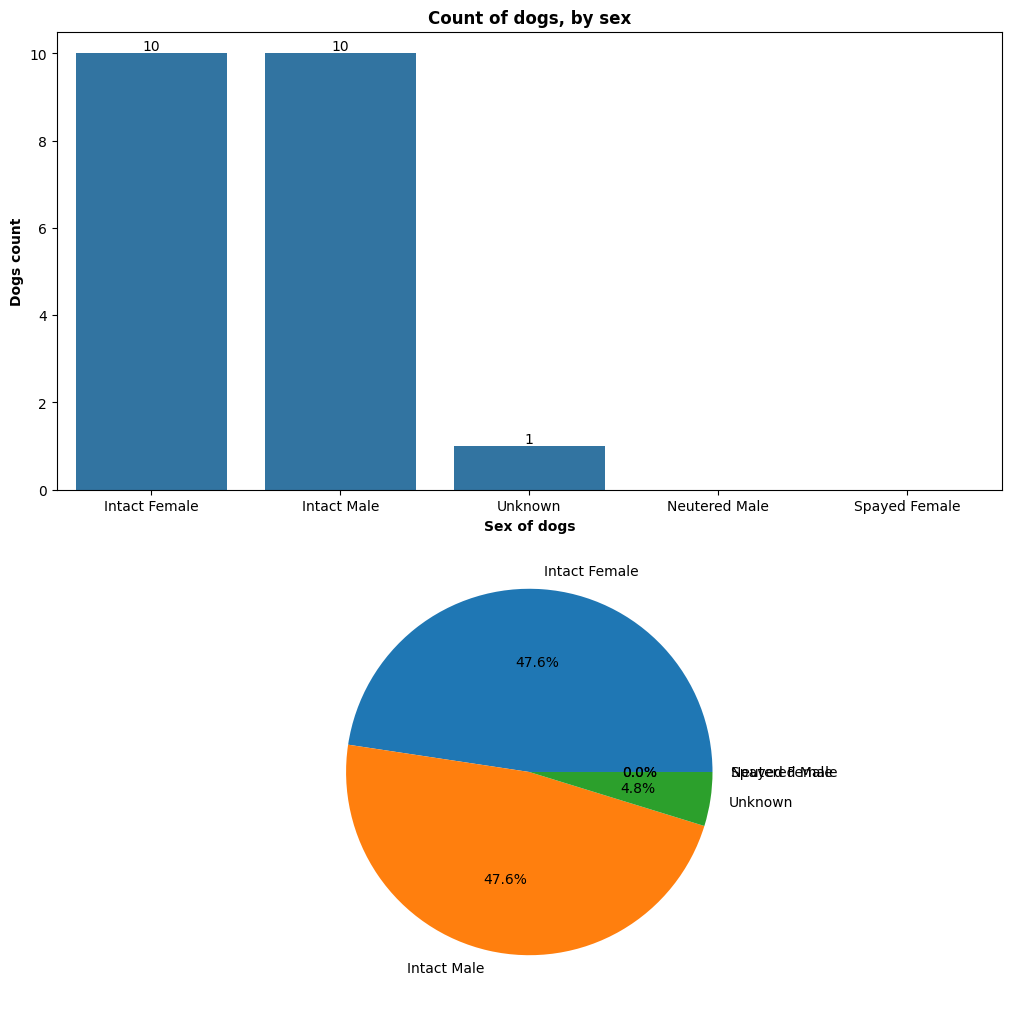

In [228]:
univariate_cat_ds_dogs(df_locations[df_locations["Type"] == "Dog"], 'Sex')

****📌CONSLUSION:**** **Based on the generated charts, the most common sexes among dogs are Intact Male and Intact Female, which appear with nearly equal frequency. There is also a small percentage of dogs whose sex is marked as Unknown.**

**👉 3. What is the distribution of animal intakes by sex?**

**1) Count the number of animals for each sex from the locations dataset**
**2) Create a DataFrame for the sex counts**

In [229]:
# 1)
sex_counts = df_locations['Sex'].value_counts()

# 2)
df_sex_counts = pd.DataFrame({'Sex': sex_counts.index, 'Count': sex_counts.values})

**Plotting the graph**

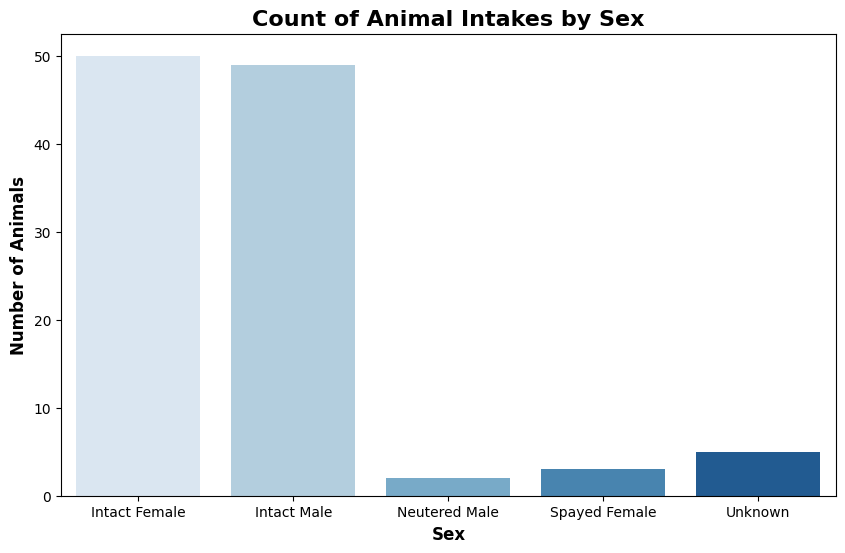

In [230]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_sex_counts, x='Sex', y='Count', hue='Sex', palette='Blues', legend=False)
plt.title('Count of Animal Intakes by Sex', fontsize=16, fontweight='bold')
plt.xlabel('Sex', fontsize=12, fontweight='bold')
plt.ylabel('Number of Animals', fontsize=12, fontweight='bold')
plt.show()

****📌CONSLUSION:**** **The graph shows that most animal intakes are intact males and females, while neutered or spayed animals and those with unknown sex are much less common.**

# 🔗Links to source cod

**MatPlotLib**
https://matplotlib.org/stable/gallery/index.html

**Seaborn**
https://seaborn.pydata.org/examples/index.html

**Pandas**
https://stackoverflow.com/questions/tagged/pandas


https://pandas.pydata.org/docs/user_guide/index.html

**ChatGPT**
https://chatgpt.com/

**Lectures**
https://courses.fit.cvut.cz/BI-VIZ/lectures/index.html

**Machine Learning Tutorials**
https://courses.fit.cvut.cz/BI-ML1/tutorials/index.html


## 🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉
## FINISH  🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁 ✅✅✅✅✅✅✅✅✅
